<a href="https://colab.research.google.com/github/adiiaryasutaa/learning-about-ai/blob/main/saham_tesla.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!unzip /content/sample_data/stock.csv.zip -d Dataset

Archive:  /content/sample_data/stock.csv.zip
replace Dataset/stock.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: Dataset/stock.csv       
replace Dataset/__MACOSX/._stock.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: Dataset/__MACOSX/._stock.csv  


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
from sklearn.svm import SVR
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
dataset = pd.read_csv('/content/Dataset/stock.csv', parse_dates=['Date'], dayfirst=True)
dataset['Year'] = dataset['Date'].dt.year
dataset['Month'] = dataset['Date'].dt.month
dataset['Day'] = dataset['Date'].dt.day

dataset

<ipython-input-59-606854126bb6>:1: UserWarning: Parsing dates in %m/%d/%Y format when dayfirst=True was specified. Pass `dayfirst=False` or specify a format to silence this warning.
  dataset = pd.read_csv('/content/Dataset/stock.csv', parse_dates=['Date'], dayfirst=True)


,Date,Open,High,Low,Close,Volume,Adj Close,Year,Month,Day
0,2010-06-29,19.000000,25.000000,17.540001,23.889999,18766300,23.889999,2010,6,29
1,2010-06-30,25.790001,30.420000,23.299999,23.830000,17187100,23.830000,2010,6,30
2,2010-07-01,25.000000,25.920000,20.270000,21.959999,8218800,21.959999,2010,7,1
3,2010-07-02,23.000000,23.100000,18.709999,19.200001,5139800,19.200001,2010,7,2
4,2010-07-06,20.000000,20.000000,15.830000,16.110001,6866900,16.110001,2010,7,6
...,...,...,...,...,...,...,...,...,...,...
1687,2017-03-13,244.820007,246.850006,242.779999,246.169998,3010700,246.169998,2017,3,13
1688,2017-03-14,246.110001,258.119995,246.020004,258.000000,7575500,258.000000,2017,3,14
1689,2017-03-15,257.000000,261.000000,254.270004,255.729996,4816600,255.729996,2017,3,15
1690,2017-03-16,262.399994,265.750000,259.059998,262.049988,7100400,262.049988,2017,3,16


In [ ]:
x = dataset.drop(columns=["High", "Date"], axis = 1)
y = dataset["High"]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42, shuffle=False)

x

,Open,Low,Close,Volume,Adj Close,Year,Month,Day
0,19.000000,17.540001,23.889999,18766300,23.889999,2010,6,29
1,25.790001,23.299999,23.830000,17187100,23.830000,2010,6,30
2,25.000000,20.270000,21.959999,8218800,21.959999,2010,7,1
3,23.000000,18.709999,19.200001,5139800,19.200001,2010,7,2
4,20.000000,15.830000,16.110001,6866900,16.110001,2010,7,6
...,...,...,...,...,...,...,...,...
1687,244.820007,242.779999,246.169998,3010700,246.169998,2017,3,13
1688,246.110001,246.020004,258.000000,7575500,258.000000,2017,3,14
1689,257.000000,254.270004,255.729996,4816600,255.729996,2017,3,15
1690,262.399994,259.059998,262.049988,7100400,262.049988,2017,3,16


In [ ]:
lr = LinearRegression()

lr_fit = lr.fit(x_train, y_train)
y_predicted = lr_fit.predict(x_test)

lr_score = lr.score(x_test, y_test)
lr_predict = lr.predict(x_test)

mse = mean_squared_error(y_test, lr_predict)

mse

2.7651531151292734

In [ ]:
test_dates = dataset.iloc[y_test.index]['Date']

df = pd.DataFrame({'Date': test_dates, 'Actual': y_test, 'Predicted': y_predicted})

df = df.sort_values(by=['Date'])

df = df.reset_index(drop=True)

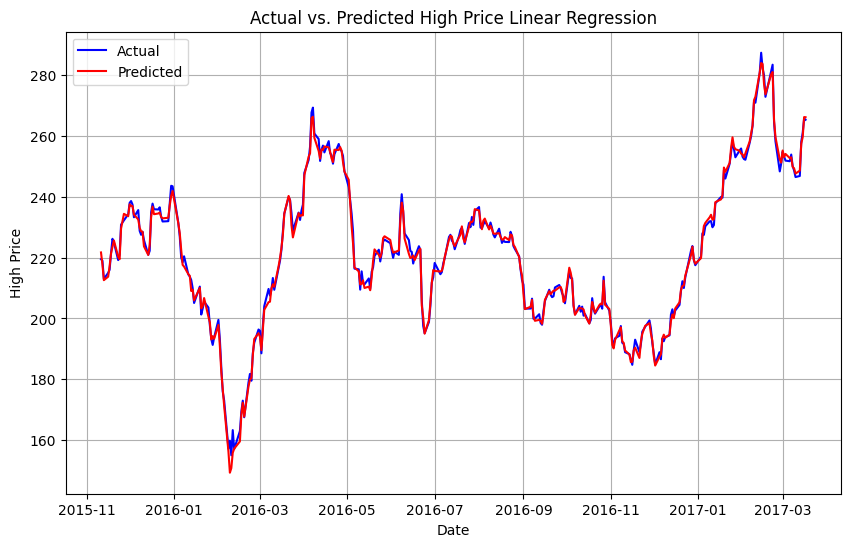

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(df['Date'], df['Actual'], label='Actual', color='blue')
plt.plot(df['Date'], df['Predicted'], label='Predicted', color='red')

plt.xlabel('Date')
plt.ylabel('High Price')
plt.title('Actual vs. Predicted High Price Linear Regression')

plt.legend()
plt.grid(True)
plt.show()

In [ ]:
dtr = DecisionTreeRegressor()
dtr_fit = dtr.fit(x_train, y_train)
dtr_predict = dtr.predict(x_test)

mse = mean_squared_error(y_test, dtr_predict)

mse

7.248395886646662

In [ ]:
dfDT = pd.DataFrame({'Date': test_dates, 'Actual': y_test, 'Predicted': dtr_predict})

dfDT = dfDT.sort_values(by=['Date'])

dfDT = dfDT.reset_index(drop=True)

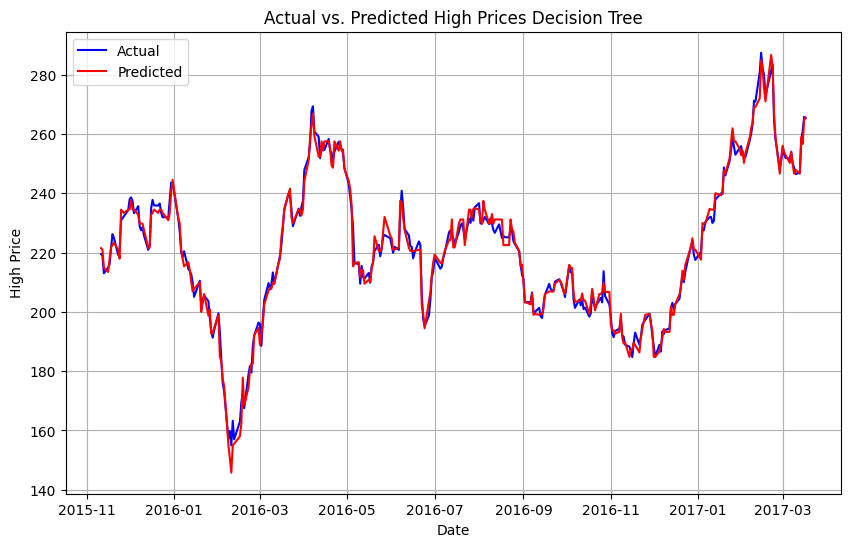

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(dfDT['Date'], dfDT['Actual'], label='Actual', color='blue')
plt.plot(dfDT['Date'], dfDT['Predicted'], label='Predicted', color='red')
plt.xlabel('Date')
plt.ylabel('High Price')
plt.title('Actual vs. Predicted High Prices Decision Tree')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
svr = SVR()
svr_fit = svr.fit(x_train, y_train)
svr_predict = svr.predict(x_test)

mse = mean_squared_error(y_test, svr_predict)

mse

11593.190191126665

In [ ]:
dfSVR = pd.DataFrame({'Date': test_dates, 'Actual': y_test, 'Predicted': svr_predict})

dfSVR = dfSVR.sort_values(by=['Date'])

dfSVR = dfSVR.reset_index(drop=True)

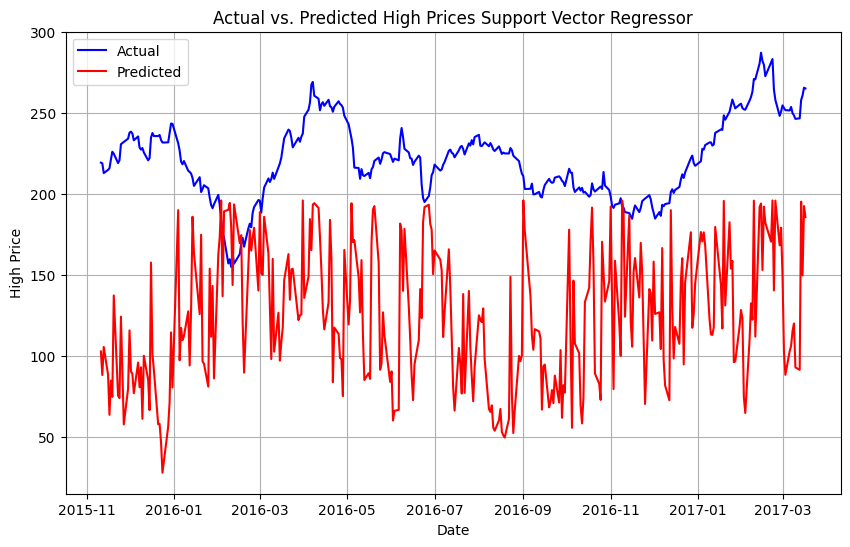

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(dfSVR['Date'], dfSVR['Actual'], label='Actual', color='blue')
plt.plot(dfSVR['Date'], dfSVR['Predicted'], label='Predicted', color='red')
plt.xlabel('Date')
plt.ylabel('High Price')
plt.title('Actual vs. Predicted High Prices Support Vector Regressor')
plt.legend()
plt.grid(True)
plt.show()